In [10]:
%reset -f
%load_ext autoreload
%autoreload 2

import random as rand
import copy 
import numpy as np
import matplotlib.pyplot as plt
import Proj5 as metah
import plot_tsp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
#inputs
rand.seed(123)
np.random.seed(123)

rand_Dist_File = 'TSP_Rand_50_dist.csv'
rand_Coords_File = 'TSP_Rand_50_coords.csv'

circ_Dist_File = 'TSP_Circle_50_dist.csv'
circ_Coords_File = 'TSP_Circle_50_coords.csv'

count_limit = 50000 #max number of iterationsbefore stopping (stopping condition)
fail_limit = 1000 # number of times a neighborhood can fail the generate a better solution before changing neigborhoods
# SA
Temp = 100 #temperature value for Simulated annealing

# PS
num_particles = 50 #number of points in particle swarm
weights = np.array([1,1,1]) #weights are w, c1 and c2

#GA
count_limit2 = 1000 #max number of iterationsbefore stopping (stopping condition)
num_chromosomes = 50 #population size in GA - must be an even number

#load data
D_rand = np.genfromtxt(rand_Dist_File, delimiter=',')
D_circ = np.genfromtxt(circ_Dist_File, delimiter=',')
#inital tour is starting at city 0 and moving to city 1, city 1 to city 2 and so on
rand_initial_tour = np.arange(D_rand.shape[0],dtype=int)
rand_initial_tour = np.random.permutation(rand_initial_tour)

circ_initial_tour = np.arange(D_circ.shape[0],dtype=int)
circ_initial_tour = np.random.permutation(circ_initial_tour)

estimated lower bound 1458.4772940085918
[0, 19, 3, 5, 44, 13, 22, 23, 18, 9, 28, 48, 32, 30, 11, 40, 4, 8, 49, 41, 15, 39, 16, 26, 7, 37, 31, 21, 29, 36, 2, 38, 42, 12, 27, 34, 6, 35, 1, 10, 45, 24, 46, 25, 17, 43, 33, 20, 14, 47]


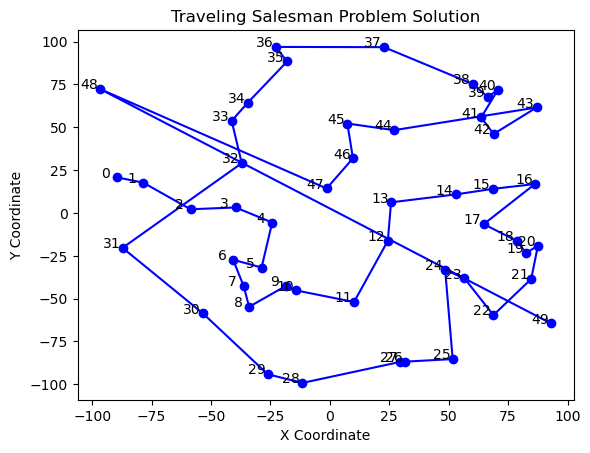

estimated lower bound 615.3470913872713
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


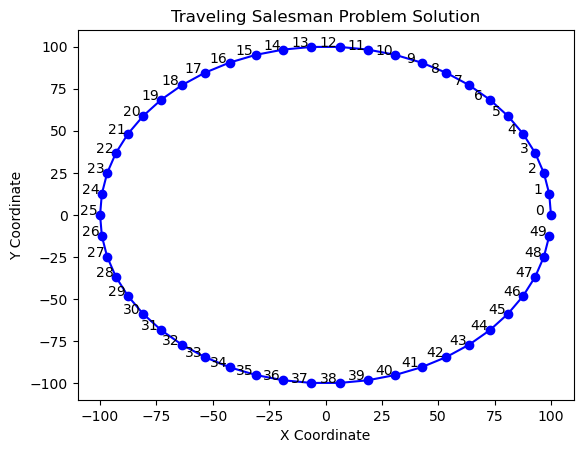

In [12]:
est, v= metah.EstimateLowerBound(D_rand)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(rand_Coords_File,est)

est, v= metah.EstimateLowerBound(D_circ)
print('estimated lower bound',v)
plot_tsp.plot_tsp_solution(circ_Coords_File,est)


-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[10 13 30 46 18  0 40 12 29  8 21 47 11 41  5  1  6 27 49 24 31 15 35 26
  7 20 48  3 23 44  4 16 36 14 43 25 37 39  9 32 33 22 42 19 17 38 34 28
  2 45]
4722.251242233047

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[14  0 19 12 27  6 34 43 35  1 17 33 20 42  3  5 44 30  8 49 26  7 32 48
 28  9 18 23 13 22 38  2 36 29 21 31 37 16 47 39 41 15  4 40 11 46 24 10
 45 25]
1295.4361628046497

-----------------------------------------------------------

[14, 0, 19, 12, 27, 6, 34, 43, 35, 1, 17, 33, 20, 42, 3, 5, 44, 30, 8, 49, 26, 7, 32, 48, 28, 9, 18, 23, 13, 22, 38, 2, 36, 29, 21, 31, 37, 16, 47, 39, 41, 15, 4, 40, 11, 46, 24, 10, 45, 25]


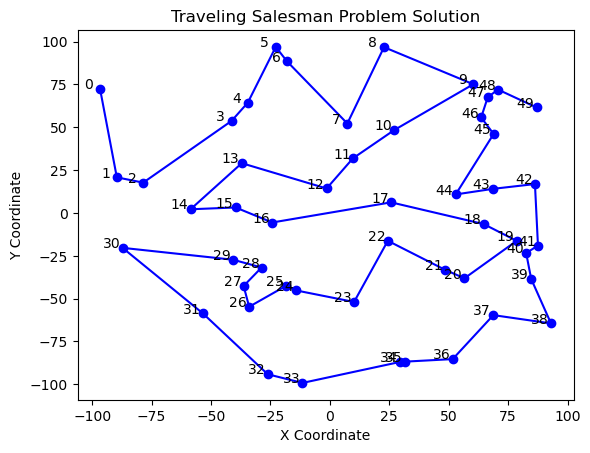

In [14]:
# rand VNS
best_tour, best_solution = metah.Variable_Neighborhood_Search(D_rand,rand_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)


-----------------------------------------------------------
Variable Neighborhood Search
-----------------------------------------------------------

The inital tour and distance is: 

[ 4  5  0 37 23 10 45 40 38  8 31 48 32 28  2 49 35 46 33  3 44 39  9 21
 29 19 34 42 47 12 17 24 20 25  1  7 11 14 41 16 26  6 30 27 43 15 36 18
 13 22]
6068.848340209952

-----------------------------------------------------------

50001 objective evaluations occured 

The final tour and distance for Variable Neighborhood Search is: 

[14 13 12 11 10  9  8  7  6  5  4  3  2  1  0 49 48 47 46 45 44 43 42 41
 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17
 16 15]
615.3470913872711

-----------------------------------------------------------

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15]


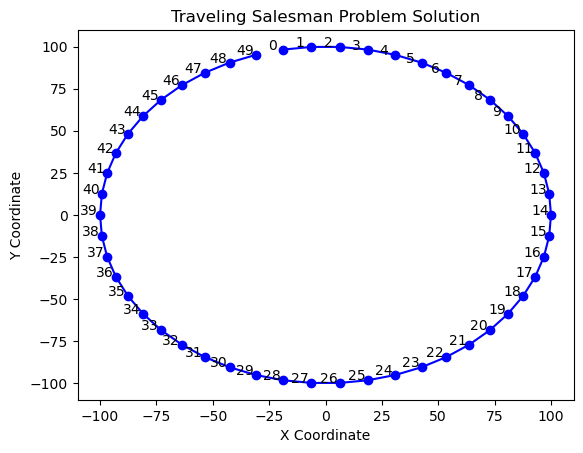

In [16]:
# circle VNS
best_tour, best_solution = metah.Variable_Neighborhood_Search(D_circ,circ_initial_tour,fail_limit, count_limit)
plot_tsp.plot_tsp_solution(circ_Coords_File,best_tour)


-----------------------------------------------------------

Genetic Algorithm

-----------------------------------------------------------

1000 iterations were performed

With population size of 50

The final tour for GA is: 

[47. 16. 39. 41. 15. 49.  4. 25. 45. 10.  1. 24. 46. 17. 11. 40.  8. 32.
  7. 26. 37. 31. 21.  9. 28. 48. 30. 43. 33. 20. 44. 22. 13. 23. 18. 29.
 36.  2. 38.  5. 42.  3. 19.  0. 14. 12. 27. 34. 35.  6.]
The final distance for GA is: 1394.5982307186143

[47, 16, 39, 41, 15, 49, 4, 25, 45, 10, 1, 24, 46, 17, 11, 40, 8, 32, 7, 26, 37, 31, 21, 9, 28, 48, 30, 43, 33, 20, 44, 22, 13, 23, 18, 29, 36, 2, 38, 5, 42, 3, 19, 0, 14, 12, 27, 34, 35, 6]


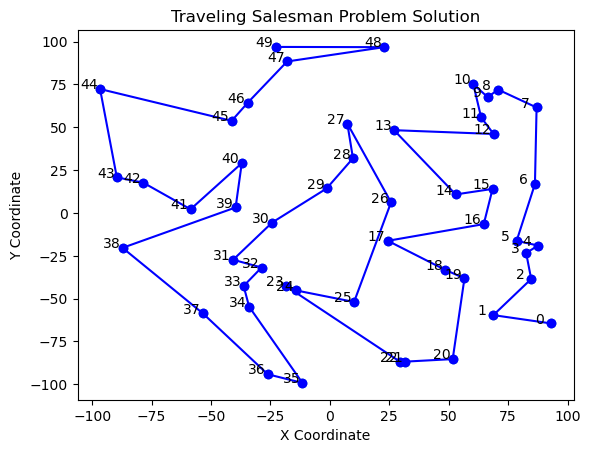

estimated lower bound 1458.4772940085918
[0, 19, 3, 5, 44, 13, 22, 23, 18, 9, 28, 48, 32, 30, 11, 40, 4, 8, 49, 41, 15, 39, 16, 26, 7, 37, 31, 21, 29, 36, 2, 38, 42, 12, 27, 34, 6, 35, 1, 10, 45, 24, 46, 25, 17, 43, 33, 20, 14, 47]


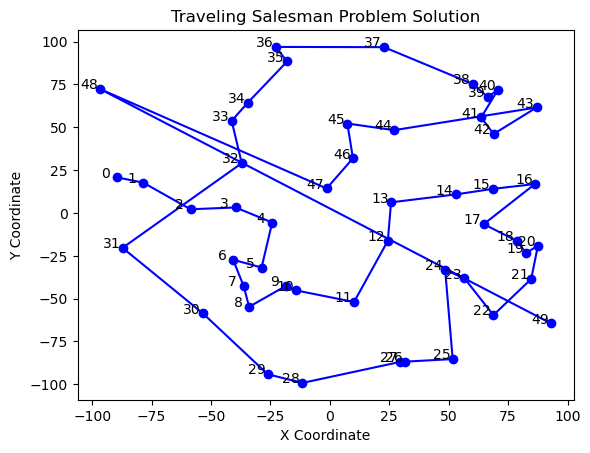

In [ ]:
# rand GA
best_tour, best_solution = metah.GA(D_rand,count_limit2, num_chromosomes)
plot_tsp.plot_tsp_solution(rand_Coords_File,best_tour)
